In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf
import math
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
#nifty = pdr.get_data_tiingo("INDF", api_key = "30f0d443a2a115c661a899929861dccfa07e7478" )
df = yf.download('^GSPC',start="2018-01-01", end="2022-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3849.280029,3003680000
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,3839.500000,2979870000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 00:00:00-05:00 to 2022-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00-05:00,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03 00:00:00-05:00,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04 00:00:00-05:00,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05 00:00:00-05:00,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08 00:00:00-05:00,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [6]:
df["Return"] = df["Adj Close"].pct_change()

In [7]:
df1 = df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

In [8]:
df1

,Close,Return
Date,,
2018-01-02 00:00:00-05:00,2695.810059,NaN
2018-01-03 00:00:00-05:00,2713.060059,0.006399
2018-01-04 00:00:00-05:00,2723.989990,0.004029
2018-01-05 00:00:00-05:00,2743.149902,0.007034
2018-01-08 00:00:00-05:00,2747.709961,0.001662
...,...,...
2022-12-23 00:00:00-05:00,3844.820068,0.005868
2022-12-27 00:00:00-05:00,3829.250000,-0.004050
2022-12-28 00:00:00-05:00,3783.219971,-0.012021


In [9]:
df1["Log_Return"] = np.log(1+df1["Return"])

In [10]:
df1 = df1.dropna()

In [11]:
df2 = df1["Log_Return"]

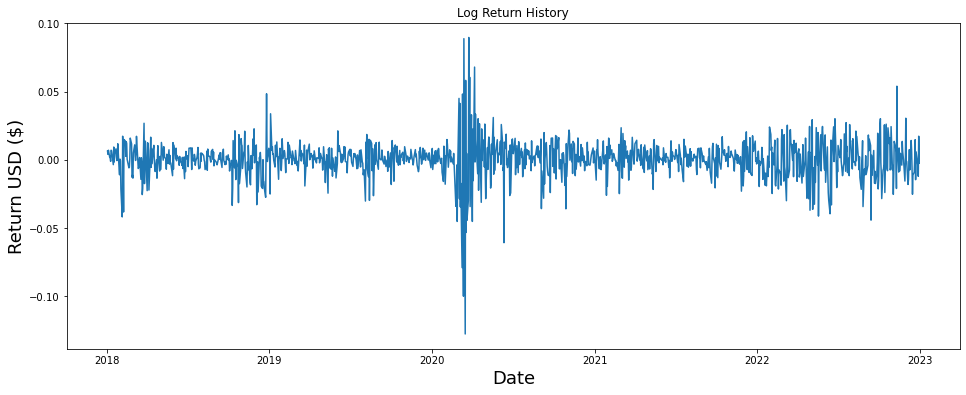

In [12]:
plt.figure(figsize=(16,6))
plt.title('Log Return History')
plt.plot(df2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [14]:
df3

array([[ 0.44086014],
       [ 0.27037536],
       [ 0.48646315],
       ...,
       [-0.89473143],
       [ 1.23130144],
       [-0.20426525]])

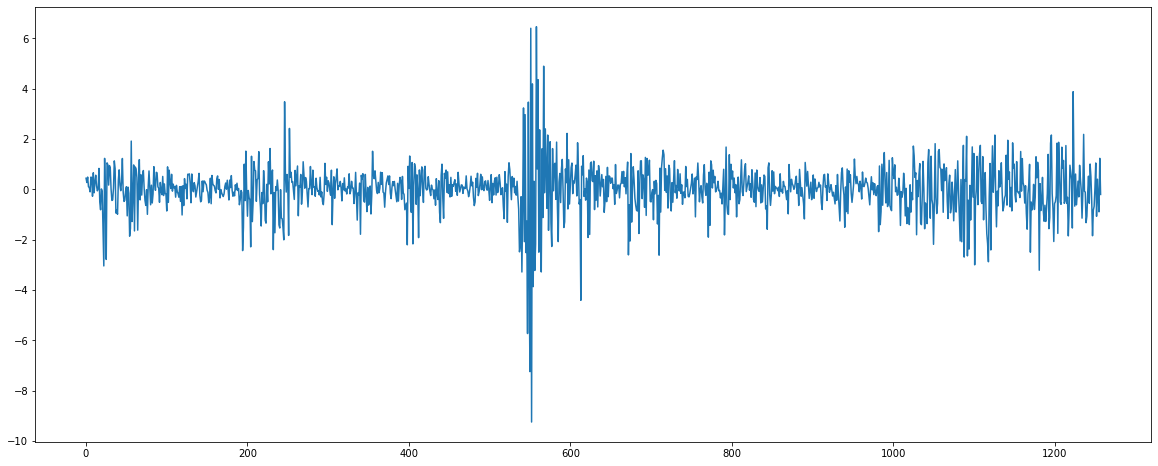

In [15]:
plt.figure(figsize = (20,8))
plt.plot(df3)

In [16]:
train_size = int(len(df3)*0.8)
test_size = len(df3)-train_size
train_size,test_size

(1006, 252)

In [17]:
train_data,test_data = df3[0:train_size],df3[train_size:]

In [18]:
train_data.shape,test_data.shape

((1006, 1), (252, 1))

In [19]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [20]:
x_train, y_train = creat_dataset(train_data,50)
x_test, y_test = creat_dataset(test_data,50)

In [21]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[ 0.44086014,  0.27037536,  0.48646315, ..., -0.4819077 ,
         -0.43542055, -0.07688455],
        [ 0.27037536,  0.48646315,  0.09976847, ..., -0.43542055,
         -0.07688455,  0.1027354 ],
        [ 0.48646315,  0.09976847,  0.07382001, ..., -0.07688455,
          0.1027354 , -1.05470898],
        ...,
        [ 1.20299647,  0.51707482,  0.22327258, ...,  1.25379672,
          0.71202126,  0.42827777],
        [ 0.51707482,  0.22327258,  0.51227544, ...,  0.71202126,
          0.42827777,  0.97342343],
        [ 0.22327258,  0.51227544,  0.24411389, ...,  0.42827777,
          0.97342343, -0.09340087]]),
 array([[-0.21045871,  0.43908081, -0.06586426, ..., -0.33130866,
         -0.96362324, -0.55889439],
        [ 0.43908081, -0.06586426, -1.4362731 , ..., -0.96362324,
         -0.55889439,  1.511262  ],
        [-0.06586426, -1.4362731 , -0.09004367, ..., -0.55889439,
          1.511262  ,  1.58026107],
        ...,
        [-1.75179715,  1.86937585,  0.80124724, ...,  

In [22]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.073391,0.045010,0.080983,0.016609,0.012289,-0.016779,0.080981,0.077586,-0.045882,0.109412,...,0.057507,0.128678,0.028337,-0.009209,0.050217,0.204002,-0.018728,-0.080224,-0.072486,-0.012799
1,0.045125,0.081190,0.016651,0.012320,-0.016822,0.081188,0.077784,-0.045999,0.109691,-0.022914,...,0.129007,0.028410,-0.009233,0.050346,0.204524,-0.018776,-0.080430,-0.072671,-0.012832,0.017146
2,0.080040,0.016415,0.012146,-0.016583,0.080038,0.076682,-0.045347,0.108137,-0.022589,0.048710,...,0.028007,-0.009102,0.049632,0.201626,-0.018510,-0.079290,-0.071641,-0.012650,0.016903,-0.173535
3,0.016466,0.012184,-0.016635,0.080288,0.076921,-0.045488,0.108474,-0.022659,0.048862,0.092523,...,-0.009130,0.049787,0.202254,-0.018567,-0.079537,-0.071865,-0.012690,0.016956,-0.174076,0.014315
4,0.012181,-0.016632,0.080273,0.076907,-0.045480,0.108454,-0.022655,0.048853,0.092506,0.022561,...,0.049778,0.202216,-0.018564,-0.079522,-0.071851,-0.012687,0.016953,-0.174043,0.014313,-0.025376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,-0.042406,0.042971,0.261236,0.112285,0.048485,0.111243,0.053010,0.042554,-0.021263,0.069962,...,0.043954,-0.117572,0.144806,-0.148521,-0.122152,0.250200,-0.142299,-0.166778,-0.184245,0.272267
951,0.042504,0.258395,0.111064,0.047957,0.110033,0.052434,0.042092,-0.021032,0.069201,0.023871,...,-0.116293,0.143231,-0.146906,-0.120824,0.247479,-0.140751,-0.164965,-0.182241,0.269307,0.152937
952,0.257539,0.110696,0.047799,0.109669,0.052260,0.041952,-0.020962,0.068972,0.023792,-0.082742,...,0.142757,-0.146420,-0.120424,0.246659,-0.140285,-0.164419,-0.181638,0.268415,0.152431,0.091686
953,0.111986,0.048355,0.110946,0.052869,0.042441,-0.021206,0.069775,0.024069,-0.083706,0.148766,...,-0.148125,-0.121827,0.249533,-0.141920,-0.166334,-0.183754,0.271542,0.154206,0.092755,0.210820


<AxesSubplot:>

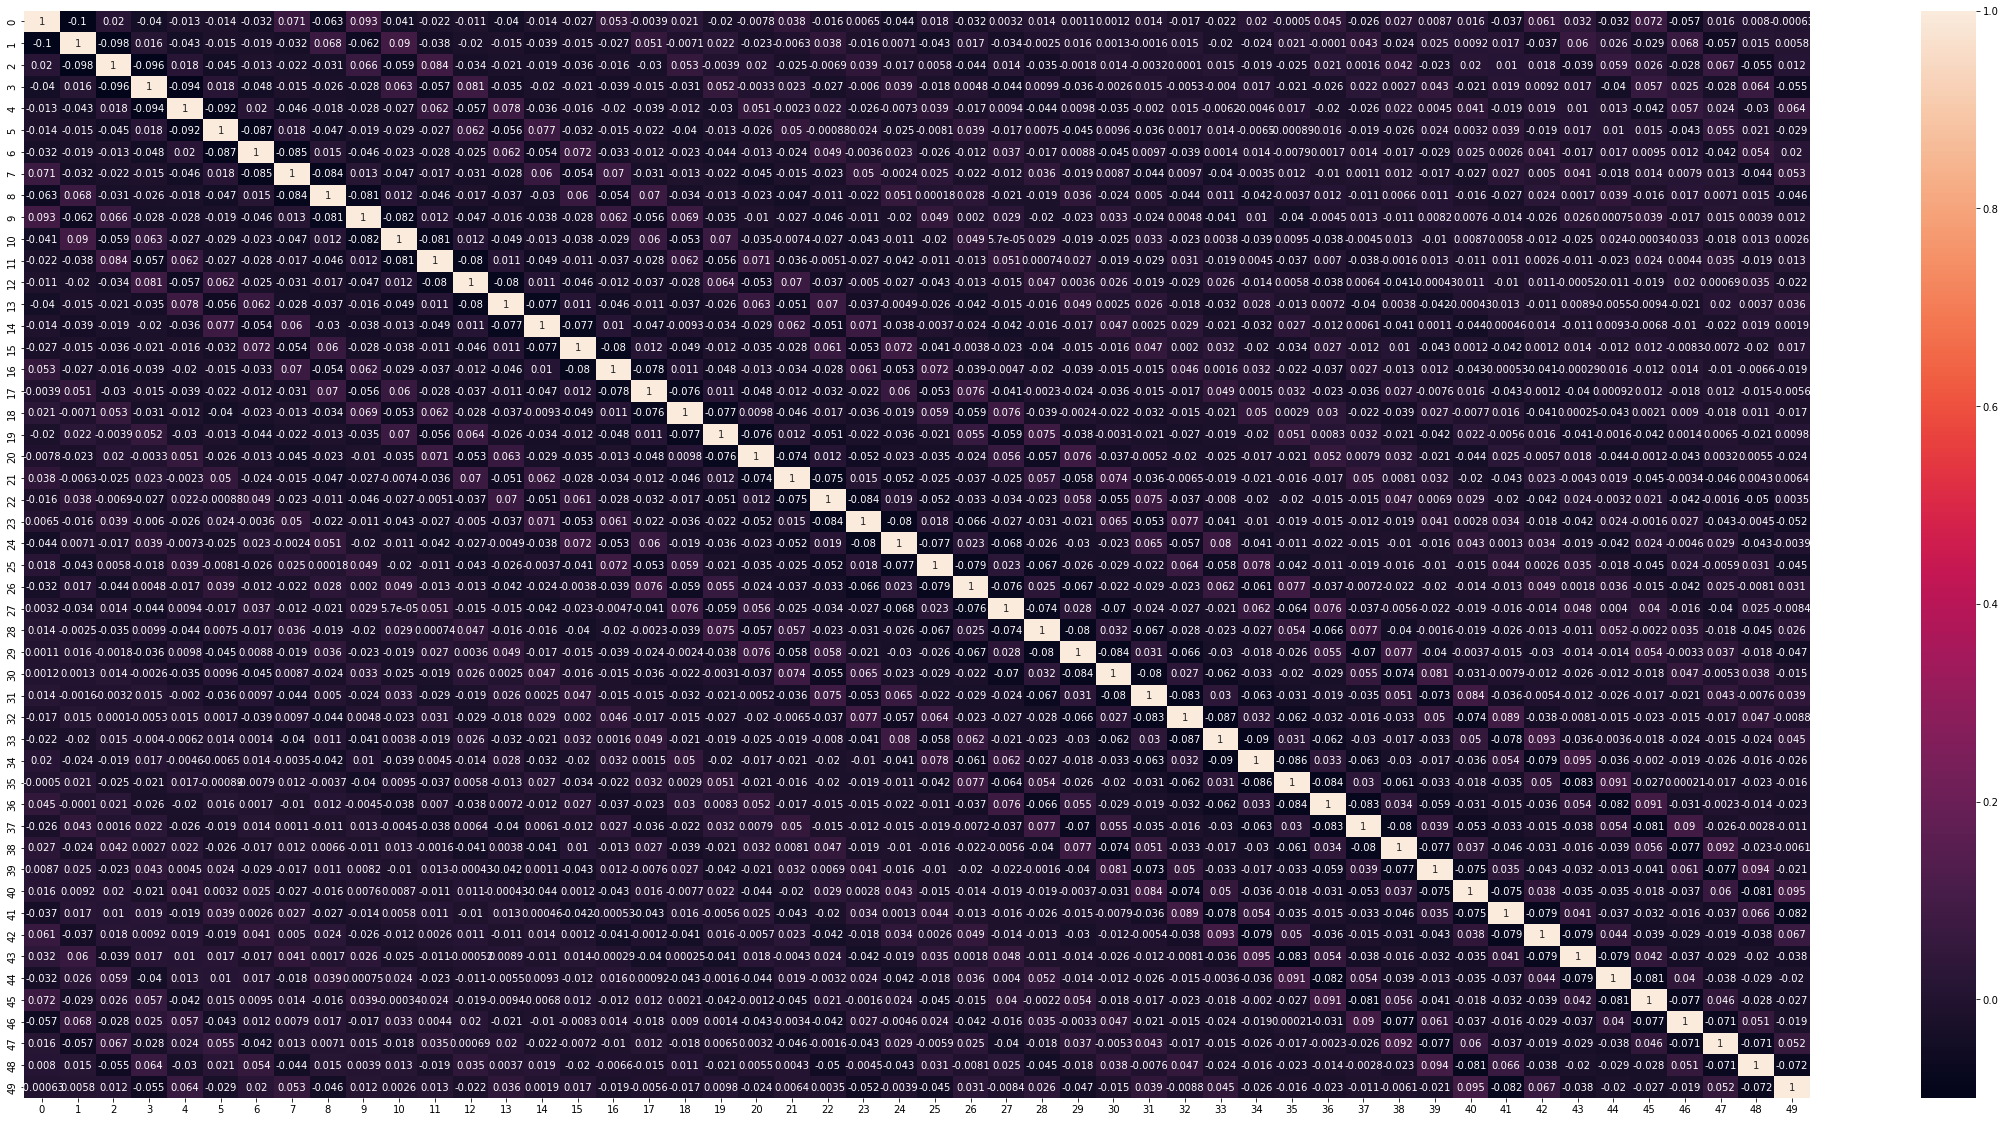

In [23]:
# plot correlation heatmap
plt.figure(figsize = (40,20))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [24]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [25]:
x_train.shape, x_test.shape

((955, 50, 1), (201, 50, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences = True, input_shape = (50,1)))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 50, batch_size = 9, verbose = 1)

Epoch 1/50
107/107 [==============================] - 34s 113ms/step - loss: 0.9665 - val_loss: 1.2844
Epoch 2/50
107/107 [==============================] - 7s 65ms/step - loss: 0.9627 - val_loss: 1.2840
Epoch 3/50
107/107 [==============================] - 7s 64ms/step - loss: 0.9625 - val_loss: 1.2846
Epoch 4/50
107/107 [==============================] - 7s 68ms/step - loss: 0.9610 - val_loss: 1.2854
Epoch 5/50
107/107 [==============================] - 7s 68ms/step - loss: 0.9609 - val_loss: 1.2841
Epoch 6/50
107/107 [==============================] - 7s 68ms/step - loss: 0.9595 - val_loss: 1.2882
Epoch 7/50
107/107 [==============================] - 7s 68ms/step - loss: 0.9615 - val_loss: 1.2863
Epoch 8/50
107/107 [==============================] - 7s 66ms/step - loss: 0.9620 - val_loss: 1.2852
Epoch 9/50
107/107 [==============================] - 7s 64ms/step - loss: 0.9601 - val_loss: 1.2838
Epoch 10/50
107/107 [==============================] - 7s 68ms/step - loss: 0.9593 - val_

In [30]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)
train_pred, test_pred

7/7 [==============================] - 0s 26ms/step


(array([[ 2.50429362e-02],
        [ 2.70632021e-02],
        [ 3.19639444e-02],
        [ 3.15621160e-02],
        [ 3.22359577e-02],
        [ 4.06568982e-02],
        [ 5.47261611e-02],
        [ 5.44785485e-02],
        [ 5.40559702e-02],
        [ 4.60578203e-02],
        [ 4.21358198e-02],
        [ 4.11296524e-02],
        [ 3.98390815e-02],
        [ 4.23079766e-02],
        [ 4.35847230e-02],
        [ 4.09543850e-02],
        [ 4.08667102e-02],
        [ 4.35333848e-02],
        [ 4.35554758e-02],
        [ 4.03504111e-02],
        [ 3.70884128e-02],
        [ 3.34592015e-02],
        [ 3.04750539e-02],
        [ 2.86301300e-02],
        [ 2.71391235e-02],
        [ 2.59233601e-02],
        [ 2.45999545e-02],
        [ 2.80151516e-02],
        [ 2.79576518e-02],
        [ 2.80248523e-02],
        [ 2.95512415e-02],
        [ 3.10227126e-02],
        [ 2.85942405e-02],
        [ 2.87380628e-02],
        [ 2.86896899e-02],
        [ 2.86668539e-02],
        [ 3.00158821e-02],
 

In [31]:
train_pred.shape

(955, 1)

In [32]:
y_train.shape, train_pred.shape

((955,), (955, 1))

In [33]:
def accuracy_LSTM(data_1, data_2):
    x = (np.sign(np.array(data_1)) == np.sign(np.array(data_2)))
    
    return print(sum(x[0]) / len(x))

In [34]:
accuracy_LSTM(train_pred, y_train)

0.5497382198952879


In [35]:
accuracy_LSTM(test_pred, y_test)

0.4427860696517413


In [36]:
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.78


In [37]:
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.14


In [38]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred.shape, test_pred.shape

((955, 1), (201, 1))

In [39]:
math.sqrt(mean_squared_error(y_train, train_pred))

0.9752683702528159

In [40]:
math.sqrt(mean_squared_error(y_test, test_pred))

1.1323482287387396

In [41]:
df3.shape

(1258, 1)

In [42]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 50
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [43]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df3)-1, :] = test_pred

In [44]:
testPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.00082674],
       [0.00079585],
       [       nan]])

In [45]:
df3 = scaler.inverse_transform(df3)

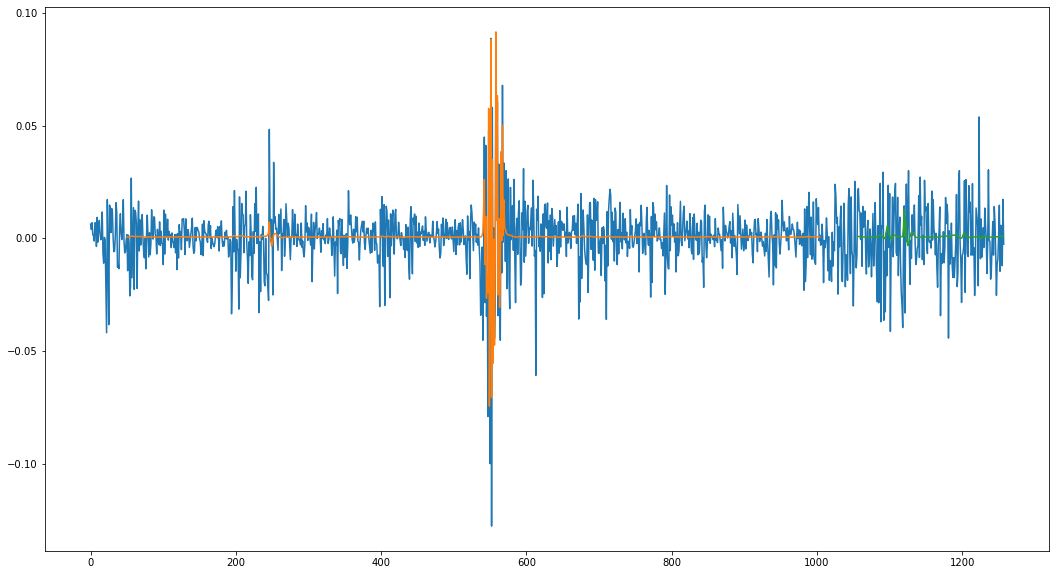

In [46]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot((df3))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

In [47]:
len(train_data),len(test_data)

(1006, 252)

In [48]:
time_stamp = 50
var = len(test_data)-time_stamp
x_input = test_data[var:].reshape(1,-1)
x_input.shape

(1, 50)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [95]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


0 day output [[0.02654745]]


In [96]:
lst_output = scaler.inverse_transform(lst_output)

In [97]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [98]:
import matplotlib.pyplot as plt

In [99]:
len(df3)

1259

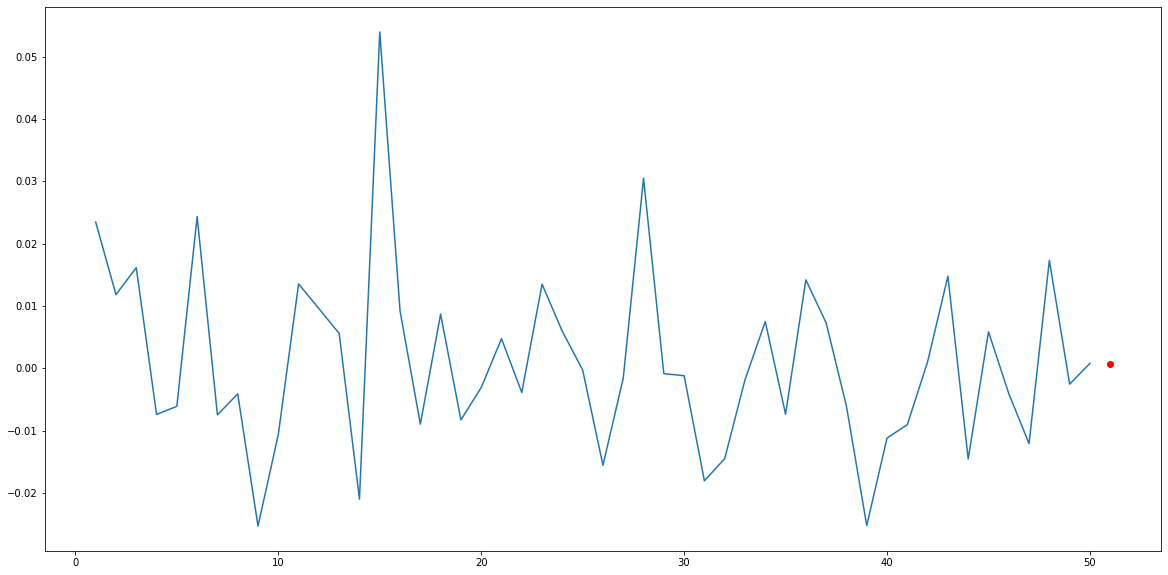

In [100]:
var_1 = len(df3)-time_stamp
plt.figure(figsize = (20,10))
plt.plot(day_new,(df3[var_1:]))
plt.scatter(day_pred,(lst_output), c = "r")

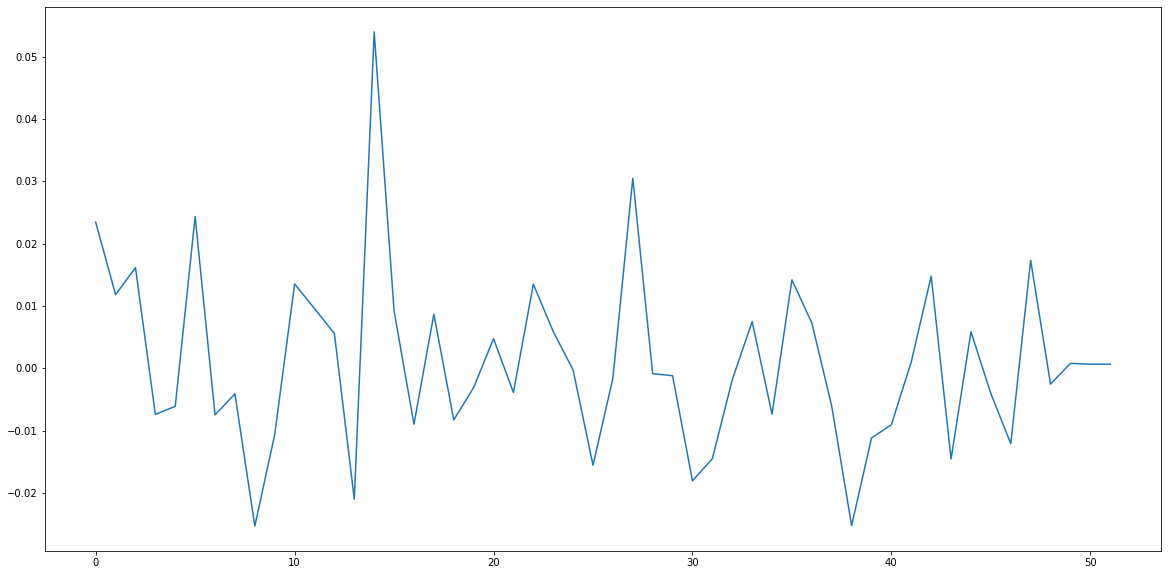

In [106]:
plt.figure(figsize = (20,10))
df3 = df3.tolist()
df3.extend((lst_output))
plt.plot((df3[var_1:]))

In [128]:
check_df = yf.download('^GSPC',start="2022-12-01", end="2023-01-04",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [129]:
check_df["Close"].tail(10)

Date
2022-12-30 00:00:00-05:00    3839.500000
2023-01-03 00:00:00-05:00    3824.139893
2023-01-04 00:00:00-05:00    3852.969971
2023-01-05 00:00:00-05:00    3808.100098
2023-01-06 00:00:00-05:00    3895.080078
2023-01-09 00:00:00-05:00    3892.090088
2023-01-10 00:00:00-05:00    3919.250000
2023-01-11 00:00:00-05:00    3969.610107
2023-01-12 00:00:00-05:00    3983.169922
2023-01-13 00:00:00-05:00    3999.090088
Name: Close, dtype: float64

In [130]:
check_df.to_csv("^GSPC_check.csv")

In [131]:
check_df = pd.read_csv("^GSPC_check.csv")

In [132]:
check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       30 non-null     object 
 1   Open       30 non-null     float64
 2   High       30 non-null     float64
 3   Low        30 non-null     float64
 4   Close      30 non-null     float64
 5   Adj Close  30 non-null     float64
 6   Volume     30 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.8+ KB


In [133]:
check_df["Date"] = pd.to_datetime(check_df["Date"])

In [134]:
check_df = check_df.set_index("Date")

In [135]:
check_df["Return"] = check_df.Close.pct_change()

In [136]:
check_df1 = check_df["Return"].dropna()
check_df1,df1[1425:]

(Date
 2022-12-02 00:00:00-05:00   -0.001195
 2022-12-05 00:00:00-05:00   -0.017894
 2022-12-06 00:00:00-05:00   -0.014399
 2022-12-07 00:00:00-05:00   -0.001862
 2022-12-08 00:00:00-05:00    0.007522
 2022-12-09 00:00:00-05:00   -0.007350
 2022-12-12 00:00:00-05:00    0.014279
 2022-12-13 00:00:00-05:00    0.007290
 2022-12-14 00:00:00-05:00   -0.006053
 2022-12-15 00:00:00-05:00   -0.024922
 2022-12-16 00:00:00-05:00   -0.011138
 2022-12-19 00:00:00-05:00   -0.009008
 2022-12-20 00:00:00-05:00    0.001037
 2022-12-21 00:00:00-05:00    0.014868
 2022-12-22 00:00:00-05:00   -0.014452
 2022-12-23 00:00:00-05:00    0.005868
 2022-12-27 00:00:00-05:00   -0.004050
 2022-12-28 00:00:00-05:00   -0.012021
 2022-12-29 00:00:00-05:00    0.017461
 2022-12-30 00:00:00-05:00   -0.002541
 2023-01-03 00:00:00-05:00   -0.004001
 2023-01-04 00:00:00-05:00    0.007539
 2023-01-05 00:00:00-05:00   -0.011646
 2023-01-06 00:00:00-05:00    0.022841
 2023-01-09 00:00:00-05:00   -0.000768
 2023-01-10 00:00:0

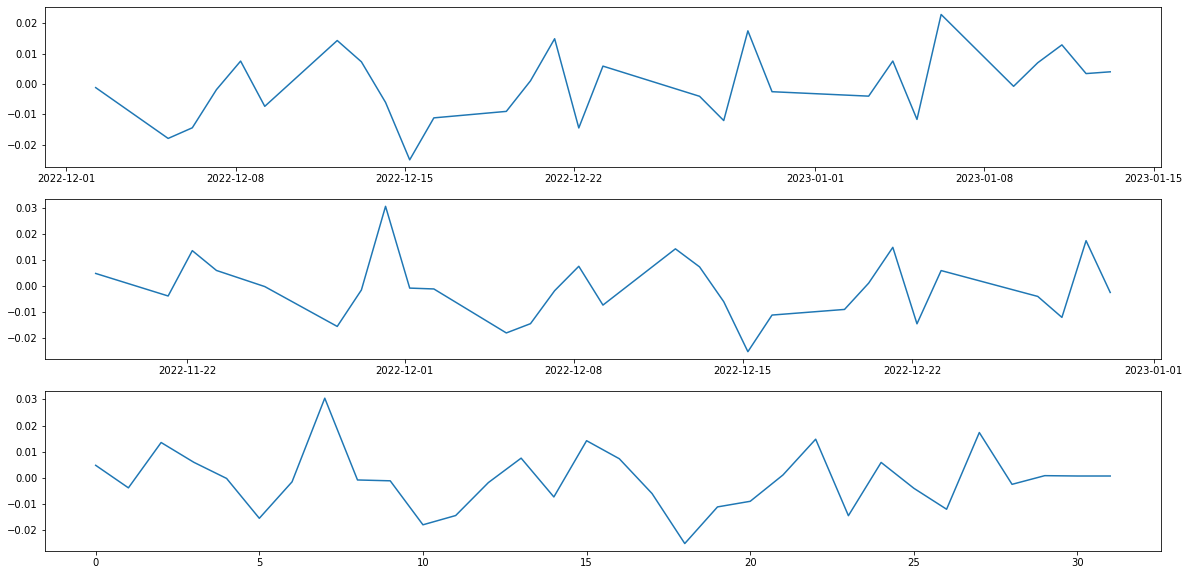

In [137]:
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
plt.plot(check_df1);
plt.subplot(3,1,2)
plt.plot(df2[var_1+20:])
plt.subplot(3,1,3)
plt.plot((df3[var_1+20:]))